In [1]:
from scipy.spatial import Voronoi
import pandas as pd
import numpy as np
import sys, os
%matplotlib inline
from tyssue.core.generation import hexa_grid2d
from tyssue import Sheet

In [2]:
h2d = hexa_grid2d(12, 12, 1, 1, noise=None)

In [9]:
sheet = Sheet.planar_sheet_3d('12x12', 12, 12, 1, 1)
bbox = [[0, 11], [0, 11]]
todel = sheet.cut_out(bbox)
sheet.remove(todel)
sheet.sanitize()

In [10]:
from tyssue.draw.plt_draw import quick_edge_draw


(<matplotlib.figure.Figure at 0x7fc89e87c5f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc89e8bf978>)

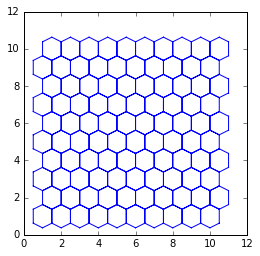

In [11]:
quick_edge_draw(sheet)

In [51]:
from itertools import product
from tyssue.core.generation import from_2d_voronoi
from tyssue.config.geometry import flat_sheet

h2d = hexa_grid2d(7, 7, 1, 1, noise=0.1)

x_max, y_max = h2d.max(axis=0)+0.5
shape = h2d.shape

x_shifts = [-x_max, 0, x_max]
y_shifts = [-y_max, 0, y_max]

repeated_points = []
for x, y in product(x_shifts, y_shifts):
    repeated_points.append(np.vstack([h2d[:, 0] + x, h2d[:, 1] + y]))

points = np.hstack(repeated_points).T
datasets = from_2d_voronoi(Voronoi(points))

n_points = shape[0]
#datasets['edge'][['srce', 'trgt']] = datasets['edge'][['srce', 'trgt']] % n_points
#datasets['vert'] = datasets['vert'].loc[3*n_points+1: 4*n_points]
#datasets['vert'].index = pd.Index(np.arange(n_points), name='vert')

sheet = Sheet('pbc', datasets, flat_sheet())

(-6.5, 13)

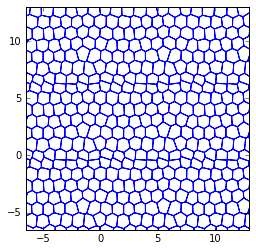

In [54]:
fig, ax = quick_edge_draw(sheet)
ax.set_xlim(-6.5, 13)
ax.set_ylim(-6.5, 13)